In [ ]:
# Experiment 5: Activation Functions Study on Fashion-MNIST
# Keep everything same except hidden-layer activation to compare: sigmoid, tanh, relu, leaky_relu

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

# 1) Load open-source dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 2) Preprocess
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
x_train = x_train.reshape((-1, 28*28))
x_test  = x_test.reshape((-1, 28*28))

num_classes = 10

def build_model(hidden_activation="relu", leaky_alpha=0.01):
    act_layer_1 = layers.Dense(256)
    act_layer_2 = layers.Dense(128)

    model = models.Sequential()
    model.add(layers.Input(shape=(784,)))

    # Hidden layer 1
    model.add(act_layer_1)
    if hidden_activation == "leaky_relu":
        model.add(layers.LeakyReLU(alpha=leaky_alpha))
    else:
        model.add(layers.Activation(hidden_activation))

    # Hidden layer 2
    model.add(act_layer_2)
    if hidden_activation == "leaky_relu":
        model.add(layers.LeakyReLU(alpha=leaky_alpha))
    else:
        model.add(layers.Activation(hidden_activation))

    # Optional: dropout to keep capacity consistent across activations
    model.add(layers.Dropout(0.2))

    # Output layer with Softmax for multi-class
    model.add(layers.Dense(num_classes, activation="softmax"))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

activations_to_test = ["sigmoid", "tanh", "relu", "leaky_relu"]
history_records = {}
results = {}

EPOCHS = 5
BATCH = 128

for act in activations_to_test:
    print(f"\n=== Training with hidden activation: {act} ===")
    model = build_model(hidden_activation=act, leaky_alpha=0.01)
    history = model.fit(
        x_train, y_train,
        validation_split=0.1,
        epochs=EPOCHS,
        batch_size=BATCH,
        verbose=2
    )
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    results[act] = {"test_loss": float(test_loss), "test_acc": float(test_acc)}
    history_records[act] = history.history
    print(f"[{act}] Test Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")

# Pretty print summary
print("\n=== Summary (Activation vs Test Accuracy) ===")
for k, v in results.items():
    print(f"{k:10s}  acc={v['test_acc']:.4f}  loss={v['test_loss']:.4f}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

=== Training with hidden activation: sigmoid ===
Epoch 1/5
422/422 - 5s - 12ms/step - accuracy: 0.7298 - loss: 0.7777 - val_accuracy: 0.8297 - val_loss: 0.4811
Epoch 2/5
422/422 - 3s - 7ms/step - accuracy: 0.8368 - loss: 0.4595 - val_accuracy: 0.8448 - val_loss: 0.4248
Epoch 3/5
422/422 - 3s - 7ms/step - accuracy: 0.8555 - loss: 0.4064 - val_accuracy: 0.8610 - val_loss: 0.3785
Epoch 4/5
422/422 - 6s - 15ms/step - accuracy: 0.8638 - loss: 0.3788 - val_accuracy: 0.8640 - val_loss: 0.3609
Epoch 5/5
422/422 - 4s - 9ms/step - accuracy: 0.8711 - loss: 0.3566 - val_accuracy: 0.8677 - val_loss: 0.3500
[sigmoid] Test Accuracy: 0.8649 | Test Loss: 0.3808

=== Training with hidden activation: tanh ===
Epoch 1/5
422/422 - 5s - 12ms/step - accuracy: 0.8057 - loss: 0.5441 - val_accuracy: 0.8450 - val_loss: 0.4199


/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/5
422/422 - 5s - 11ms/step - accuracy: 0.8045 - loss: 0.5551 - val_accuracy: 0.8495 - val_loss: 0.4056
Epoch 2/5
422/422 - 4s - 10ms/step - accuracy: 0.8597 - loss: 0.3911 - val_accuracy: 0.8615 - val_loss: 0.3676
Epoch 3/5
422/422 - 3s - 7ms/step - accuracy: 0.8741 - loss: 0.3457 - val_accuracy: 0.8653 - val_loss: 0.3566
Epoch 4/5
422/422 - 6s - 14ms/step - accuracy: 0.8824 - loss: 0.3177 - val_accuracy: 0.8795 - val_loss: 0.3364
Epoch 5/5
422/422 - 4s - 10ms/step - accuracy: 0.8899 - loss: 0.2995 - val_accuracy: 0.8812 - val_loss: 0.3252
[leaky_relu] Test Accuracy: 0.8747 | Test Loss: 0.3437

=== Summary (Activation vs Test Accuracy) ===
sigmoid     acc=0.8649  loss=0.3808
tanh        acc=0.8645  loss=0.3666
relu        acc=0.8698  loss=0.3592
leaky_relu  acc=0.8747  loss=0.3437


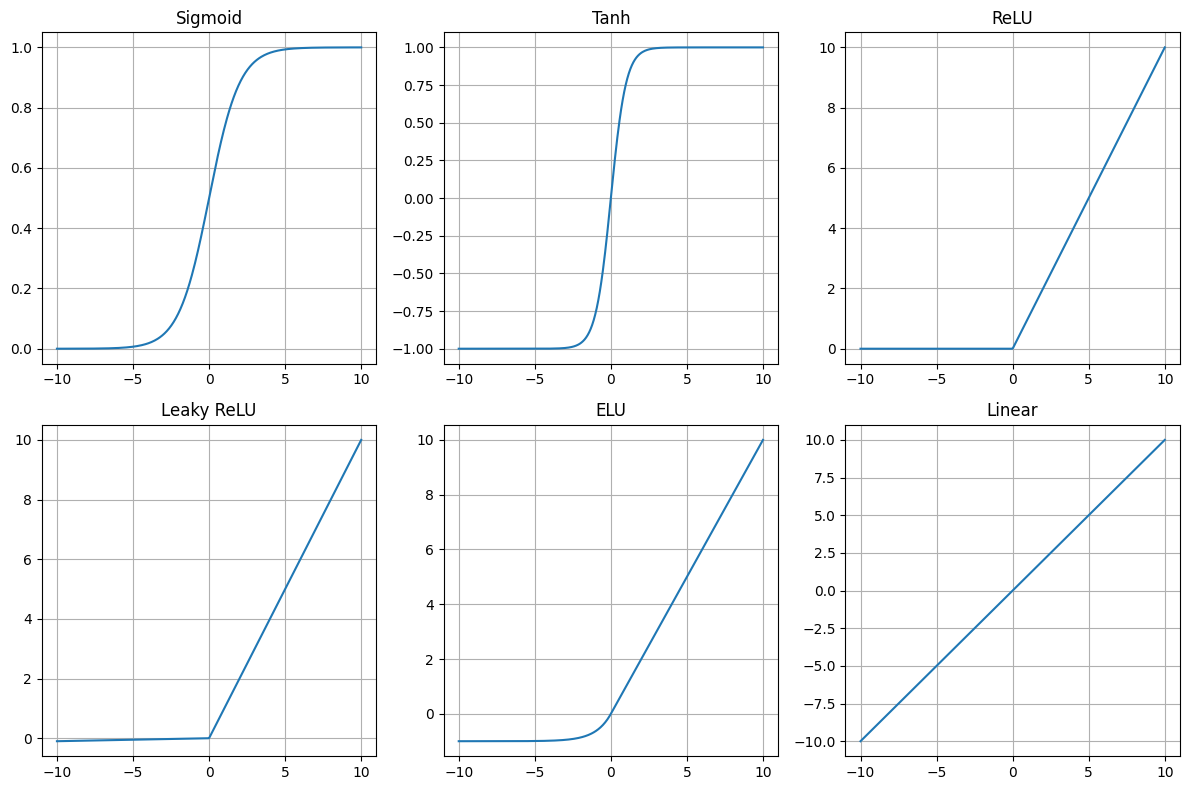

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define input range
x = np.linspace(-10, 10, 400)

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def linear(x):
    return x

def softmax(x):
    e_x = np.exp(x - np.max(x))  # for numerical stability
    return e_x / e_x.sum(axis=0)

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid')
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(x, tanh(x))
plt.title('Tanh')
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(x, relu(x))
plt.title('ReLU')
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(x, leaky_relu(x))
plt.title('Leaky ReLU')
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(x, elu(x))
plt.title('ELU')
plt.grid(True)

plt.subplot(2, 3, 6)
plt.plot(x, linear(x))
plt.title('Linear')
plt.grid(True)

plt.tight_layout()
plt.show()
